## Setup

### Imports

In [191]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

### Notebook settings

In [192]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

sns.set_theme(style='white', palette='Blues_r')

### Functions

In [193]:
# Functions 

#plot boxplot
def boxplot_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, ticks=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.subplots(figsize=(10,5))
    sns.boxplot(data=df, x=x, y=y, hue=hue, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(list(range(len(ticks))),ticks)
    plt.title(title)
    plt.legend().remove()
    plt.show()
    if show_leg == True:
        plt.legend(loc='best')

# plot scatterplot
def scatter_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.show()
    plt.subplots(figsize=(10,5))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend().remove()
    if show_leg == True:
        plt.legend(loc='best')

# plot timeseries plot
def timeseries_plot(df, y, ylabel, color='blue', target_var=False, existing_ax=None):
    if target_var == True:
        color = 'black'
    if existing_ax == None:
        fig, ax = plt.subplots(figsize=(10,5))
    else:
        ax = existing_ax
    sns.lineplot(df, x=df.index, y=y, color=color, label=y.replace("_"," ").title())
    ax.set(title=f"{ylabel} over time", ylabel=ylabel, label=y, xlabel="Date")
    plt.legend(loc='best')

from statsmodels.tsa.stattools import adfuller

# function for adf test
def dickeyFullerTest(df):
    for column in df.columns:
        result = adfuller(df[column])
        # print(f"Column: {column}, ADF statistic: {result[0]}, p-value: {result[1]}")
        # for key, value in result[4].items():
        #     print(f"Critical value ({key}): {value}")
        if (result[1] < 0.05) &  (result[4]['1%'] > result[0]):
            print(f'{column} is stationary')
        else:
            print(f'{column} is not stationary')




from mpl_toolkits.axes_grid1 import host_subplot

# plot duel times series
def plot_dual_axis_timeseries(df, y1, y2, ylabel1, ylabel2, color1='blue', color2='black'):
    fig, axi = plt.subplots(figsize=(10,5))
    ax = host_subplot(111) # subplot(nrows, ncols, plot_number)
    ax0 = ax.twinx()
    ax1 = sns.lineplot(data=df, x=df.index, y=y1, ax=ax, color=color1, label=ylabel1, legend=False)
    ax2 = sns.lineplot(data=df, x=df.index, y=y2, ax=ax0, color=color2, label=ylabel2, legend=False)
    axi.set(xticks=[], yticks=[])
    ax1.set(ylabel=ylabel1, title=f"{ylabel1} and {ylabel2} over time")
    ax0.set(ylabel=ylabel2)
    ax.legend()
    ax.yaxis.get_label()
    ax.yaxis.get_label()


# annotate and vertical line
def annotate_and_line(x=None, y=None, color="red", linestyle="--", annotation=None, vertical_line=False, time_series=False, annot_x=None):    
    if time_series:
        x=pd.to_datetime(x)
        annot_x = pd.to_datetime(annot_x)
    if vertical_line:    
        plt.axvline(x, color=color, linestyle=linestyle)
    if annot_x:
        x = annot_x
    if annotation:
        plt.annotate(annotation, xy=(x, y), color=color)


# Corr bar plot
def corr_bar(df, title, y_label, group, var_comp):
    data = df.corr()[var_comp]
    plt.figure(figsize=(10,5))
    data[group].sort_values().plot(kind='bar', color='blue')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()


# Histogram and boxplot (and skew output) CLO
def den_hist_boxplot(data, features, bins, target_var=False, color='blue'):
    for col in features:
        if target_var == True:
            color = 'black'
        print(f'{col} skew: {round(data[col].skew(), 2)}')
        plt.figure(figsize = (15,5))
        plt.subplot(1, 2, 1)
        sns.histplot(data = data, features=data[col], bins=bins, stat='density', kde=True, color=color)
        plt.xticks(rotation=90)
        plt.ticklabel_format(style='plain')
        plt.title(f'Density Histogram of {col}')
        plt.subplot(1, 2, 2)
        sns.boxplot(data = data, x=data[col], color=color)
        plt.title(f'Boxplot of {col}')
        plt.xticks(rotation=90)


# Histogram JM
def histogram_plot(df, x, xlabel, bin_edges, stat='density', kde=True, color='blue', target_var=False, xrange=None, yrange=None):
    if target_var == True:
        color = 'black'
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.histplot(data=df, x=x, stat=stat, kde=kde, bins=bin_edges, color=color),
    ax.set(title=f'{xlabel} Overall Distribution', xlabel=xlabel, xlim=xrange, ylim=yrange);

# Multiple annotation on a graph with arrow
def annotate_graph (text, xdate, y, xtext, ytext):
    plt.annotate(text, xy =((pd.to_datetime(xdate)), y), xytext =(pd.to_datetime(xtext), ytext),  
                arrowprops = dict(facecolor = 'blue', shrink = 0.05, headwidth = 7, headlength = 7),
                fontsize= 8)

# Correlation heatmap
def correlation_heat_map(df, title, method="pearson", vmin=-1, vmax=1):
    col_names = [col.replace("_", " ") for col in df.columns]
    ax = sns.heatmap(df.corr(method=method), annot=True, fmt=".2f", xticklabels=col_names, yticklabels=col_names, cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax.set(title=title)

### Reading in data

In [194]:
# Import dataset
df_waiting_list = pd.read_csv('../05.output/actual/waiting_list_for_forecasting.csv', index_col='Unnamed: 0')
df_waiting_list.index = pd.to_datetime(df_waiting_list.index)

# Check dataframe integrity
print(f'Dataframe Shape: ', df_waiting_list.shape)
print(f'Dataframe Columns: ', df_waiting_list.columns)
print(f'Dataframe Data Types: ', df_waiting_list.dtypes)
print(f'Dataframe Nulls: ', df_waiting_list.isnull().sum())

Dataframe Shape:  (227, 1)
Dataframe Columns:  Index(['waiting_list'], dtype='object')
Dataframe Data Types:  waiting_list    float64
dtype: object
Dataframe Nulls:  waiting_list    0
dtype: int64


In [195]:
df_new_demands = pd.read_csv('../05.output/actual/new_demand_for_forecasting.csv', index_col='Unnamed: 0')
df_new_demands.index = pd.to_datetime(df_new_demands.index)

# Check dataframe integrity
print(f'Dataframe Shape: ', df_new_demands.shape)
print(f'Dataframe Columns: ', df_new_demands.columns)
print(f'Dataframe Data Types: ', df_new_demands.dtypes)
print(f'Dataframe Nulls: ', df_new_demands.isnull().sum())

Dataframe Shape:  (94, 1)
Dataframe Columns:  Index(['new_demand'], dtype='object')
Dataframe Data Types:  new_demand    float64
dtype: object
Dataframe Nulls:  new_demand    0
dtype: int64


In [196]:
df_breaches = pd.read_csv('../05.output/actual/breaches_for_forecasting.csv', index_col='Unnamed: 0')
df_breaches.index = pd.to_datetime(df_breaches.index)

# Check dataframe integrity
print(f'Dataframe Shape: ', df_breaches.shape)
print(f'Dataframe Columns: ', df_breaches.columns)
print(f'Dataframe Data Types: ', df_breaches.dtypes)
print(f'Dataframe Nulls: ', df_breaches.isnull().sum())

Dataframe Shape:  (227, 1)
Dataframe Columns:  Index(['breaches'], dtype='object')
Dataframe Data Types:  breaches    float64
dtype: object
Dataframe Nulls:  breaches    0
dtype: int64


## Creating univariate models

### ARIMA

#### Waiting List

In [197]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit, train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# Define the parameter grid for ARIMA
param_grid = {
    'p': range(3),  # testing AR p values from 0 to 2
    'd': range(2),  # testing differencing d values of 0 to 1
    'q': range(3)}  # testing MA q values from 0 to 2

# Split the data into training and validation/test sets
train_data = df_waiting_list[(df_waiting_list.index >= '2019-09-15') & (df_waiting_list.index <= '2022-09-15')]
validate_data = df_waiting_list[(df_waiting_list.index > '2022-09-15') & (df_waiting_list.index <= '2023-09-16')]
test_data = df_waiting_list[(df_waiting_list.index > '2023-09-16')]

# Extract features and target variable for training set
X_train = train_data.drop(columns=['waiting_list'])
y_train = train_data['waiting_list']

# Extract features and target variable for test set
X_test = df_waiting_list.drop(columns=['waiting_list'])
y_test = test_data['waiting_list']

# The line "best_mse = np.inf" initializes the variable "best_mse" to positive infinity (np.inf). 
# This is commonly done when you want to find the minimum value of something during a loop or iteration process, e.g. when optimizing an ARIMA model.
best_mse = np.inf
best_params = {}

# Iterate over the parameter grid
for p in param_grid['p']:
    for d in param_grid['d']:
        for q in param_grid['q']:
            # Fit the ARIMA model
            model = ARIMA(y_train, order=(p, d, q))
            fitted_model = model.fit()

            # Make predictions on the test set
            y_pred_test = fitted_model.forecast(steps=len(y_test))

            # Calculate MSE
            mse = mean_squared_error(y_test, y_pred_test)

            # Update best parameters if MSE improves
            if mse < best_mse:
                best_mse = mse
                best_params = {'p': p, 'd': d, 'q': q}

                # Generate forecasts for the validation/data using the best model
                y_pred_val = fitted_model.forecast(steps=len(validate_data))

# Extract the last observation in the training set for the naive forecast
naive_forecast = y_train.iloc[-1]

# Calculate the naive forecast for all future time periods in the test set
y_naive_forecast = np.full_like(y_test, fill_value=naive_forecast)

# Calculate the MSE for the naive forecast
naive_mse = mean_squared_error(y_test, y_naive_forecast)

# Print the best parameters and best MSE
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_mse)
print("Naive Mean Squared Error:", naive_mse)

Best Parameters: {'p': 1, 'd': 1, 'q': 1}
Best Mean Squared Error: 2600152.0295567196
Naive Mean Squared Error: 2841574.2177777793


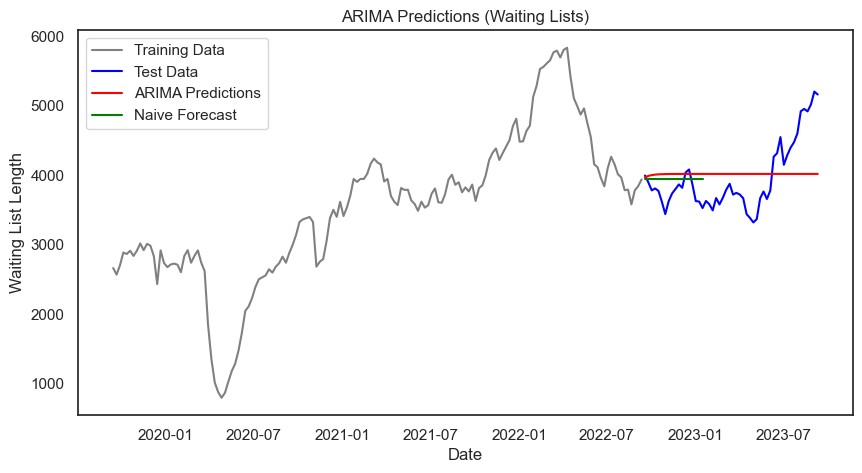

In [198]:
# Timeseries_plot function doesn't like series so I had to plot this manually. This includes validation data and simple naive forecast.
plt.subplots(figsize=(10, 5))
plt.plot(train_data.index, train_data['waiting_list'], label='Training Data', color='gray')  # Historic training data
plt.plot(validate_data.index, validate_data['waiting_list'], label='Test Data', color='blue')  # True values
plt.plot(validate_data.index, y_pred_val, label='ARIMA Predictions', color='red')  # ARIMA predictions
plt.plot(validate_data.index[:len(y_naive_forecast)], y_naive_forecast, label='Naive Forecast', color='green')  # Naive forecast

plt.xlabel('Date')
plt.ylabel('Waiting List Length')
plt.title('ARIMA Predictions (Waiting Lists)')
plt.legend()
plt.show()

Interpretation: ARIMA performs poorly when asked to predict waiting list length based on the historic data provided, as it predicts a flat line with no uptrends or downtrends which we know is incorrect from looking at the test data. Naive Forecast is even worse. 

#### Breaches

In [199]:
# Define the parameter grid for ARIMA
param_grid = {
    'p': range(3),  # Example: testing AR p values from 0 to 2
    'd': range(2),  # Example: testing differencing d values of 0 to 1
    'q': range(3),  # Example: testing MA q values from 0 to 2
}

# Split the data into training and validation/test sets
train_data = df_breaches[(df_breaches.index >= '2019-09-15') & (df_breaches.index <= '2022-09-15')]
validate_data = df_breaches[(df_breaches.index > '2022-09-15') & (df_breaches.index <= '2023-09-16')]
test_data = df_breaches[(df_breaches.index > '2023-09-16')]

# Extract features and target variable for training set
X_train = train_data.drop(columns=['breaches'])
y_train = train_data['breaches']

# Extract features and target variable for test set
X_test = df_breaches.drop(columns=['breaches'])
y_test = test_data['breaches']

# The line "best_mse = np.inf" initializes the variable "best_mse" to positive infinity (np.inf). 
# This is commonly done when you want to find the minimum value of something during a loop or iteration process, e.g. when optimizing an ARIMA model.
best_mse = np.inf
best_params = {}

# Iterate over the parameter grid
for p in param_grid['p']:
    for d in param_grid['d']:
        for q in param_grid['q']:
            # Fit the ARIMA model
            model = ARIMA(y_train, order=(p, d, q))
            fitted_model = model.fit()

            # Make predictions on the test set
            y_pred_test = fitted_model.forecast(steps=len(y_test))

            # Calculate MSE
            mse = mean_squared_error(y_test, y_pred_test)

            # Update best parameters if MSE improves
            if mse < best_mse:
                best_mse = mse
                best_params = {'p': p, 'd': d, 'q': q}

                # Generate forecasts for the validation/data using the best model
                y_pred_val = fitted_model.forecast(steps=len(validate_data))

# Extract the last observation in the training set for the naive forecast
naive_forecast = y_train.iloc[-1]

# Calculate the naive forecast for all future time periods in the test set
y_naive_forecast = np.full_like(y_test, fill_value=naive_forecast)

# Calculate the MSE for the naive forecast
naive_mse = mean_squared_error(y_test, y_naive_forecast)

# Print the best parameters and best MSE
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_mse)
print("Naive Mean Squared Error:", naive_mse)

Best Parameters: {'p': 0, 'd': 0, 'q': 1}
Best Mean Squared Error: 892268.7697920221
Naive Mean Squared Error: 1266607.0266666668


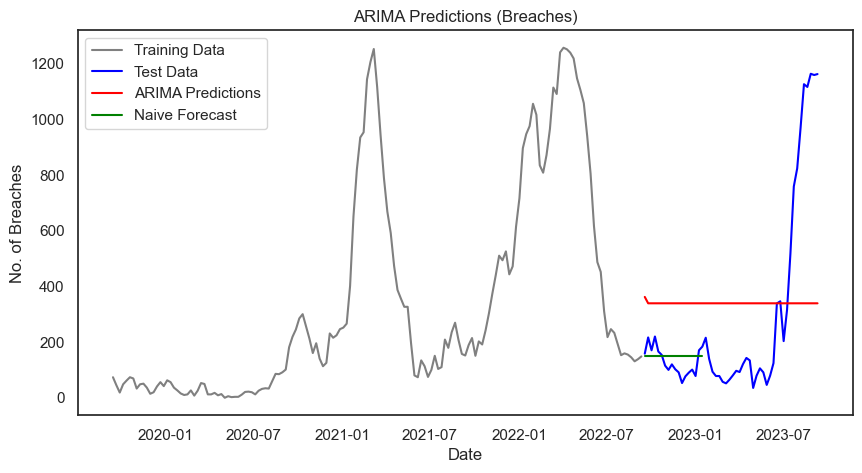

In [200]:
# Plotting ARIMA results about breach predictions.
plt.subplots(figsize=(10, 5))
plt.plot(train_data.index, train_data['breaches'], label='Training Data', color='gray')  # Historic training data
plt.plot(validate_data.index, validate_data['breaches'], label='Test Data', color='blue')  # True values
plt.plot(validate_data.index, y_pred_val, label='ARIMA Predictions', color='red')  # ARIMA predictions
plt.plot(validate_data.index[:len(y_naive_forecast)], y_naive_forecast, label='Naive Forecast', color='green')  # Naive forecast

plt.xlabel('Date')
plt.ylabel('No. of Breaches')
plt.title('ARIMA Predictions (Breaches)')
plt.legend()
plt.show()

Interpretation: ARIMA appears to be a poor model for predicting breaches, showing a clear difficulty in its ability to correctly predict test data.  Naive forecasting remains completely inappropriate.

#### New Demand

In [201]:
# Define the parameter grid for ARIMA
param_grid = {
    'p': range(3),  # Example: testing AR p values from 0 to 2
    'd': range(2),  # Example: testing differencing d values of 0 to 1
    'q': range(3),  # Example: testing MA q values from 0 to 2
}

# Split the data into training and validation/test sets
train_data = df_new_demands[df_new_demands.index <= '2023-5-21'] # everything before 21st May 2023
validate_data = df_new_demands[(df_new_demands.index >= '2023-05-22') & (df_new_demands.index <= '2023-10-08')] # 22nd May 2023 up to and including 8th of October 2023
test_data = df_new_demands[df_new_demands.index >= '2023-10-9'] # 9th October 2023 onwards

# Extract features and target variable for training set
X_train = train_data.drop(columns=['new_demand'])
y_train = train_data['new_demand']

# Extract features and target variable for test set
X_test = df_new_demands.drop(columns=['new_demand'])
y_test = test_data['new_demand']

# The line "best_mse = np.inf" initializes the variable "best_mse" to positive infinity (np.inf). 
# This is commonly done when you want to find the minimum value of something during a loop or iteration process, e.g. when optimizing an ARIMA model.
best_mse = np.inf
best_params = {}

# Iterate over the parameter grid
for p in param_grid['p']:
    for d in param_grid['d']:
        for q in param_grid['q']:
            # Fit the ARIMA model
            model = ARIMA(y_train, order=(p, d, q))
            fitted_model = model.fit()

            # Make predictions on the test set
            y_pred_test = fitted_model.forecast(steps=len(y_test))

            # Calculate MSE
            mse = mean_squared_error(y_test, y_pred_test)

            # Update best parameters if MSE improves
            if mse < best_mse:
                best_mse = mse
                best_params = {'p': p, 'd': d, 'q': q}

                # Generate forecasts for the validation/data using the best model
                y_pred_val = fitted_model.forecast(steps=len(validate_data))

# Extract the last observation in the training set for the naive forecast
naive_forecast = y_train.iloc[-1]

# Calculate the naive forecast for all future time periods in the test set
y_naive_forecast = np.full_like(y_test, fill_value=naive_forecast)

# Calculate the MSE for the naive forecast
naive_mse = mean_squared_error(y_test, y_naive_forecast)

# Print the best parameters and best MSE
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_mse)
print("Naive Mean Squared Error:", naive_mse)

Best Parameters: {'p': 2, 'd': 0, 'q': 2}
Best Mean Squared Error: 59596.107665981595
Naive Mean Squared Error: 61586.40714285716


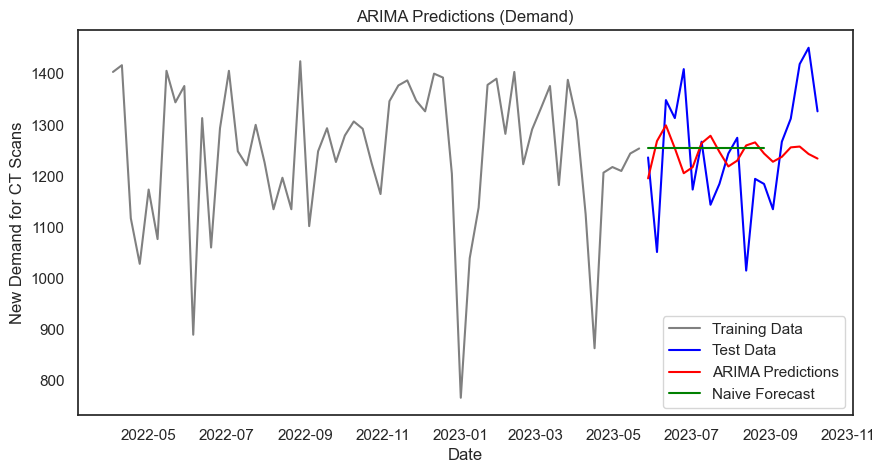

In [202]:
# Plotting ARIMA results about demand predictions.
plt.subplots(figsize=(10, 5))
plt.plot(train_data.index, train_data['new_demand'], label='Training Data', color='gray')  # Historic training data
plt.plot(validate_data.index, validate_data['new_demand'], label='Test Data', color='blue')  # True values
plt.plot(validate_data.index, y_pred_val, label='ARIMA Predictions', color='red')  # ARIMA predictions
plt.plot(validate_data.index[:len(y_naive_forecast)], y_naive_forecast, label='Naive Forecast', color='green')  # Naive forecast

plt.xlabel('Date')
plt.ylabel('New Demand for CT Scans')
plt.title('ARIMA Predictions (Demand)')
plt.legend()
plt.show()

Interpretation: remarkably, ARIMA performs slightly better when asked to predict new demand for CT scans because unlike in the other cases, it was able to predict uptrends and downtrends with some moderate accuracy although it underestimated them in terms of magnitude and direction does not always match test data.

#### Overall?

Overall ARIMA shows a limited ability to predict new demand albeit with noticeable inaccuracy, but is not capable of making predictions with any accuracy on breaches and waiting list using the historic data provided by our NHS Trust. 

When it comes to improving the performance of an ARIMA model, a greater length of historic training data would be helpful and experimenting with different hyperparameter inputs can also be useful.

We have already done some hyperparameter tuning using my loop iteration method, but this could be expanded further. 